<table style="width:100%; border: 0px solid black;">
    <tr style="width: 100%; border: 0px solid black;">
        <td style="width:75%; border: 0px solid black;">
            <a href="http://www.drivendata.org">
                <img src="https://s3.amazonaws.com/drivendata.org/kif-example/img/dd.png" />
            </a>
        </td>
    </tr>
</table>

# Data Science is Software
## Developer #lifehacks for the Jupyter Data Scientist

### Section 3:  Writing code for reusability

In [2]:
%matplotlib inline
from __future__ import print_function

import os

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

PROJ_ROOT = os.path.join(os.pardir, os.pardir)

## 3.1 No more docs-guessing

Don't edit-run-repeat to try to remember the name of a function or argument. Jupyter provides great docs integration and easy ways to remember the arguments to a function.

In [3]:
## Try adding parameter index=0
pump_data_path = os.path.join(PROJ_ROOT,
                              "data",
                              "raw",
                              "pumps_train_values.csv")

df = pd.read_csv(pump_data_path, index_col=0)
df.head(1)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [5]:
pd.read_csv?

   usecols=None,
    squeeze=False,
    prefix=None,
    mangle_dupe_cols=True,
    dtype=None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal: str = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    escapechar=None,
    comment=None,
    encoding=None,
    dialect=None,
    error_bad_lines=True,
    warn_bad_lines=True,
    delim_whitespace=False,
    low_memory=True,
    memory_map=False,
    float_precision=None,
    storage_options: Optional[Dict[str, Any]] = None,
)
Docstring:
Re

In [6]:
# Tab completion for parsing dates in the date_recoreded column
# Shift tab for documentation
df = pd.read_csv(pump_data_path, index_col=0)

df.head(1)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


## 3.2 No more copy-pasta

Don't repeat yourself.

In [7]:
df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


/home/nam/Development/anaconda3/envs/water-pumps/lib/python3.9/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1000 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


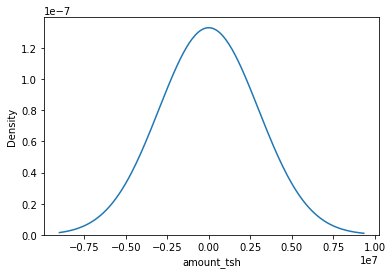

In [8]:
## Paste for 'construction_year' and plot
## Paste for 'gps_height' and plot
plot_data = df['amount_tsh']
sns.kdeplot(plot_data, bw=1000)
plt.show()

In [9]:
def kde_plot(dataframe, variable, upper=None, lower=None, bw=0.1):
    """ Plots a density plot for a variable with optional upper and
        lower bounds on the data (inclusive).
    """
    plot_data = dataframe[variable]
    
    if upper is not None:
        plot_data = plot_data[plot_data <= upper]
    if lower is not None:
        plot_data = plot_data[plot_data >= lower]

    sns.kdeplot(plot_data, bw=bw)
    plt.show()

In [10]:
def kde_plot(dataframe, variable, upper=None, lower=None, bw=0.1):
    """ Plots a density plot for a variable with optional upper and
    lower bounds on the data (inclusive)"""
    plot_data = dataframe[variable]
    
    if upper is not None:
        plot_data = plot_data[plot_data <= upper]
    if lower is not None:
        plot_data = plot_data[plot_data >= lower]
        
    sns.kdeplot(plot_data, bw=bw)
    plt.show()

/home/nam/Development/anaconda3/envs/water-pumps/lib/python3.9/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1000 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


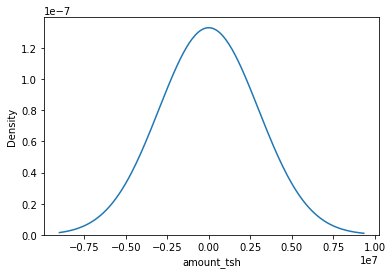

/home/nam/Development/anaconda3/envs/water-pumps/lib/python3.9/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


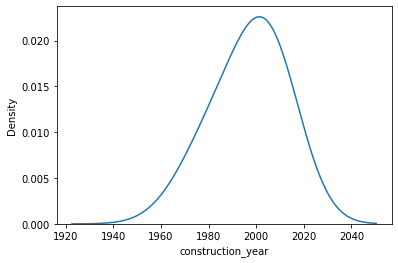

/home/nam/Development/anaconda3/envs/water-pumps/lib/python3.9/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 100 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


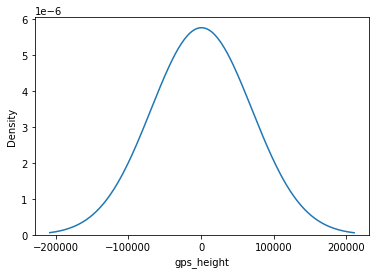

In [11]:
kde_plot(df, 'amount_tsh', bw=1000, lower=0)
kde_plot(df, 'construction_year', bw=1, lower=1000, upper=2016)
kde_plot(df, 'gps_height', bw=100)

## 3.3 No more copy-pasta between notebooks 

Have a method that gets used in multiple notebooks? Refactor it into a separate `.py` file so it can live a happy life!

Note: In order to import your local modules, you must do three things:

 - put the .py file in a separate folder
 - add an empty `__init__.py` file to the folder
 - add that folder to the Python path with `sys.path.append`

In [12]:
sys.path

['/mnt/4ba37af6-51fd-47bc-8321-8c500c229114/study/machine learning/Online courses/SCIPY_2016/water-pumps/notebooks/lectures',
 '/home/nam/.vscode/extensions/ms-toolsai.jupyter-2021.5.745244803/pythonFiles',
 '/home/nam/program/spark-3.0.0-preview-bin-hadoop2.7/python',
 '/home/nam/.vscode/extensions/ms-toolsai.jupyter-2021.5.745244803/pythonFiles',
 '/home/nam/.vscode/extensions/ms-toolsai.jupyter-2021.5.745244803/pythonFiles/lib/python',
 '/home/nam/Development/anaconda3/envs/water-pumps/lib/python39.zip',
 '/home/nam/Development/anaconda3/envs/water-pumps/lib/python3.9',
 '/home/nam/Development/anaconda3/envs/water-pumps/lib/python3.9/lib-dynload',
 '',
 '/home/nam/Development/anaconda3/envs/water-pumps/lib/python3.9/site-packages',
 '/home/nam/Development/anaconda3/envs/water-pumps/lib/python3.9/site-packages/IPython/extensions',
 '/home/nam/.ipython',
 '/mnt/4ba37af6-51fd-47bc-8321-8c500c229114/study/machine learning/Online courses/SCIPY_2016/water-pumps/notebooks/lectures/../src',

In [13]:
# add local python functions
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(PROJ_ROOT, "src")
sys.path.append(src_dir)

# import my method from the source code
from features.build_features import remove_invalid_data

df = remove_invalid_data(pump_data_path)
df.shape

KeyError: "['status_group'] not found in axis"

In [5]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(PROJ_ROOT, 'src')
sys.path.append(src_dir)

# import my method from the source code
%aimport features.build_features
from features.build_features import remove_invalid_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# TRY ADDING print("lalalala") to the method
df = remove_invalid_data(pump_data_path)

KeyError: "['status_group'] not found in axis"

Restart the kernel, let's try this again....

In [4]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

# import my method from the source code
%aimport features.build_features
from features.build_features import remove_invalid_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'features'

In [17]:
df = remove_invalid_data(pump_data_path)
df.head()

KeyError: "['status_group'] not found in axis"

## 3.4 I'm too good! Now this code is useful to other projects!

Importing local code is great if you want to use it in multiple notebooks, but once you want to use the code in multiple projects or repositories, it gets complicated. This is when we get serious about isolation!

We can build a python package to solve that! In fact, there is a [cookiecutter to create Python packages](https://github.com/wdm0006/cookiecutter-pipproject).

Once we create this package, we can install it in "editable" mode, which means that as we change the code the changes will get picked up if the package is used. The process looks like

    cookiecutter https://github.com/wdm0006/cookiecutter-pipproject
    cd package_name
    pip install -e .
    
Now we can have a separate repository for this code and it can be used across projects without having to maintain code in multiple places.

## 3.5 Sometimes things go wrong

Interrupt execution with:
 - `%debug` magic: drops you out into _the most recent error stacktrace_ in pdb
 - `import q;q.d()`: drops you into pdb, even outside of IPython
 
Interrupt execution on an Exception with `%pdb` magic. Use [pdb](https://docs.python.org/2/library/pdb.html) the Python debugger to debug inside a notebook.  Key commands for `pdb` are:

 - `p`: Evaluate and print Python code
 
 
 - `w`: Where in the stack trace am I?
 - `u`: Go up a frame in the stack trace.
 - `d`: Go down a frame in the stack trace.
 
 
 - `c`: Continue execution
 - `q`: Stop execution

In [ ]:
kde_plot(df,
         'date_recorded',
         upper=pd.to_datetime('2017-01-01'),
         lower=pd.to_datetime('1900-01-01'))

In [ ]:
%debug

In [ ]:
# "1" turns pdb on, "0" turns pdb off
%pdb 1

kde_plot(df, 'date_recorded')

In [ ]:
# turn off debugger
%pdb 0

In [ ]:
import q
q.d()

Python console opened by q.d() in <module>


In : exit()
In : exit()
In : quit()
In : close


NameError: name 'close' is not defined

In : close()


NameError: name 'close' is not defined

In : stop


NameError: name 'stop' is not defined

In : ctrl+C


NameError: name 'ctrl' is not defined

In : exit


In : exit()
In : exit()
In : q.d()


Python console opened by q.d() in <module>


In : exit()
In : quit()
In : q.quit()


AttributeError: 'Q' object has no attribute 'quit'

**`#lifehack`: %debug and %pdb are great, but pdb can be clunky. Try the 'q' module. Adding the line `import q;q.d()` anywhere in a project gives you a normal python console at that point. This is great if you're running outside of IPython. **

## 3.6 Code profiling

Sometimes your code is slow. See which functions are called, how many times, and how long they take!

The `%prun` magic reports these to you right in the Jupyter notebook!

In [ ]:
import numpy as np
from mcmc.hamiltonian import hamiltonian, run_diagnostics

f = lambda X: np.exp(-100*(np.sqrt(X[:,1]**2 + X[:,0]**2)- 1)**2 + (X[:,0]-1)**3 - X[:,1] - 5)

# potential and kinetic energies
U = lambda q: -np.log(f(q))
K = lambda p: p.dot(p.T) / 2

# gradient of the potential energy
def grad_U(X):
    x, y = X[0,:]

    xy_sqrt = np.sqrt(y**2 + x**2)
        
    mid_term = 100*2*(xy_sqrt - 1) 
    grad_x = 3*((x-1)**2) - mid_term * ((x) / (xy_sqrt))
    grad_y = -1 - mid_term * ((y) / (xy_sqrt))
    
    return -1*np.array([grad_x, grad_y]).reshape(-1, 2)

ham_samples, H = hamiltonian(2500, U, K, grad_U)
run_diagnostics(ham_samples)

In [ ]:
%prun ham_samples, H = hamiltonian(2500, U, K, grad_U)
run_diagnostics(ham_samples)

## 3.7 The world beyond Jupyter

### Graphical Debugging (IDEs)


[PyCharm](https://www.jetbrains.com/pycharm/download/) is a fully-featured Python IDE. It has _tons_ of integrations with the normal development flow. The features I use most are:

 - `git` integration
 - interactive graphical debugger
 - flake8 linting
 - smart refactoring/go to